In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def edge_boxes(image, model, num_boxes = 80):

    edge_detection = cv2.ximgproc.createStructuredEdgeDetection(model)
    rgb_im = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    edges = edge_detection.detectEdges(np.float32(rgb_im) / 255.0)

    orimap = edge_detection.computeOrientation(edges)
    edges = edge_detection.edgesNms(edges, orimap)

    edge_boxes = cv2.ximgproc.createEdgeBoxes()
    edge_boxes.setMaxBoxes(num_boxes)
    boxes, scores = edge_boxes.getBoundingBoxes(edges, orimap)

    return boxes, scores

In [22]:
def show_edge_boxes(image, rects):
    imOut = image.copy()

    # itereate over all the region proposals
    for _, rect in enumerate(rects):
        # draw rectangle for region proposal
        x, y, w, h = rect
        color = list(np.random.random(size=3) * 256)
        cv2.rectangle(imOut, (x, y), (x+w, y+h), color, 2, cv2.LINE_AA)

    plt.imshow(imOut[...,::-1])
    plt.axis('off')

In [23]:
img = cv2.imread('Potholes/annotated-images/img-1.jpg')
edgeboxes, scores = edge_boxes(img, './model.yml')


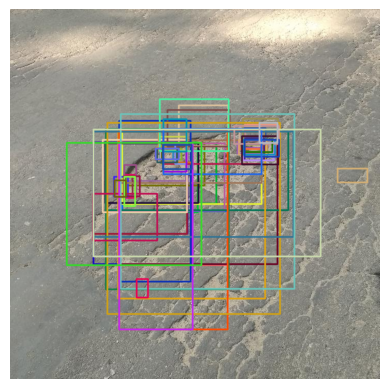

In [24]:
show_edge_boxes(img, edgeboxes)

In [25]:
scores

array([[0.07388881],
       [0.06836101],
       [0.06813917],
       [0.06300882],
       [0.06134712],
       [0.05915467],
       [0.05814315],
       [0.05693814],
       [0.05684227],
       [0.05576374],
       [0.05386916],
       [0.05372543],
       [0.05269327],
       [0.0517493 ],
       [0.0516698 ],
       [0.05110258],
       [0.05095593],
       [0.05069448],
       [0.05054827],
       [0.05040189],
       [0.048826  ],
       [0.04790596],
       [0.04782896],
       [0.0470099 ],
       [0.04657365],
       [0.04648682],
       [0.04627287],
       [0.04623381],
       [0.04588658],
       [0.04509748],
       [0.04480132],
       [0.04465346],
       [0.04432719],
       [0.04402829],
       [0.04396092],
       [0.04386121],
       [0.04349966],
       [0.04335979],
       [0.04255537],
       [0.04223233],
       [0.04221518],
       [0.04182104],
       [0.04140999],
       [0.04140999],
       [0.04080066],
       [0.04069362],
       [0.04065254],
       [0.040